In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

## Import Raw Data

In [2]:
data = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


## Drop Columns Not Being Used

In [3]:
data.drop(columns=['DailyRate','EmployeeCount','MonthlyRate','Over18','StandardHours'],inplace=True)

## Prep Categorical Data

In [4]:
data['Attrition'] = data['Attrition'].map({'No':1,'Yes':0})
data['Education'] = data['Education'].map({1:'Below Collage',2:'College',3:'Bachelor',4:'Master',5:'Doctor'})
data['EnvironmentSatisfaction'] = data['EnvironmentSatisfaction'].map({1:'Negative',2:'Negative',3:'Positive',4:'Positive'})
data['JobInvolvement'] = data['JobInvolvement'].map({1:'Negative',2:'Negative',3:'Positive',4:'Positive'})
data['JobSatisfaction'] = data['JobSatisfaction'].map({1:'Negative',2:'Negative',3:'Positive',4:'Positive'})
data['PerformanceRating'] = data['PerformanceRating'].map({1:'Low',2:'Good',3:'Excellent',4:'Oustanding'})
data['RelationshipSatisfaction'] = data['RelationshipSatisfaction'].map({1:'Negative',2:'Negative',3:'Positive',4:'Positive'})
data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,0,Travel_Rarely,Sales,1,College,Life Sciences,1,Negative,Female,94,Positive,2,Sales Executive,Positive,Single,5993,8,Yes,11,Excellent,Negative,0,8,0,1,6,4,0,5
1,49,1,Travel_Frequently,Research & Development,8,Below Collage,Life Sciences,2,Positive,Male,61,Negative,2,Research Scientist,Negative,Married,5130,1,No,23,Oustanding,Positive,1,10,3,3,10,7,1,7
2,37,0,Travel_Rarely,Research & Development,2,College,Other,4,Positive,Male,92,Negative,1,Laboratory Technician,Positive,Single,2090,6,Yes,15,Excellent,Negative,0,7,3,3,0,0,0,0
3,33,1,Travel_Frequently,Research & Development,3,Master,Life Sciences,5,Positive,Female,56,Positive,1,Research Scientist,Positive,Married,2909,1,Yes,11,Excellent,Positive,0,8,3,3,8,7,3,0
4,27,1,Travel_Rarely,Research & Development,2,Below Collage,Medical,7,Negative,Male,40,Positive,1,Laboratory Technician,Negative,Married,3468,9,No,12,Excellent,Positive,1,6,3,3,2,2,2,2


## Preprocess Continuous Variables
This section we will take a look at non categorical variables. These variables fall in a range of numbers unique to each field. In order to use these variables in Logistic Regression, you must create bins and then encode them as if they were categories. We will create the bins for each continuous variable and then use the .get_dummies() method to make each bin its own category.

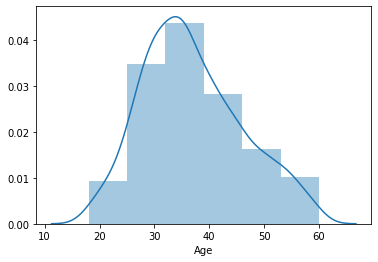

In [5]:
sns.distplot(data['Age'],bins=6)
data['Age_Bins'] = pd.cut(data['Age'], [0,25,30,40,100], labels=['0-25','26-30','31-40','>60'])


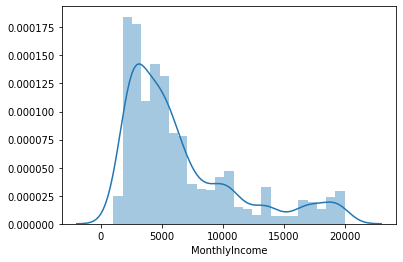

In [6]:
sns.distplot(data['MonthlyIncome'],bins=25)
data['Monthly_Income'] = pd.cut(data['MonthlyIncome'], [0, 3000,5000,10000,20000], labels=['0-3000','3001-5000','5001-10000','10001-20000'])

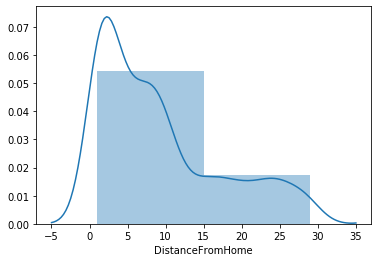

In [7]:
sns.distplot(data['DistanceFromHome'],bins=2)
data['Distance_From_Home'] = pd.cut(data['DistanceFromHome'], [0, 5, 10, 15, 30], labels=['0-5 Mi','6-10 Mi','11-15 Mi','16-30 Mi'])

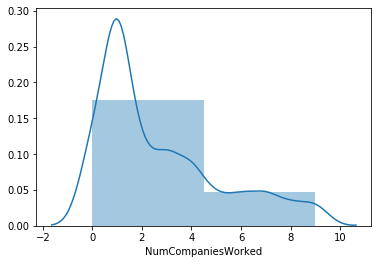

In [8]:
sns.distplot(data['NumCompaniesWorked'],bins=2)
data['Num_Companies_Worked'] = pd.cut(data['NumCompaniesWorked'], [0, 2, 4, 10], labels=['0-2','3-4','5-10'])


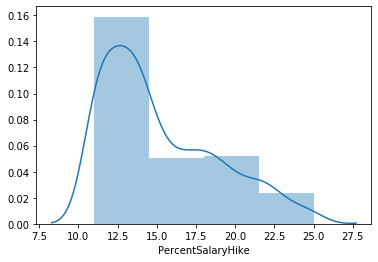

In [9]:
sns.distplot(data['PercentSalaryHike'],bins=4)
data['Percent_Salary_Hike'] = pd.cut(data['PercentSalaryHike'], [0, 11, 15, 30], labels=['0-11%','12-15%','16-30%'])


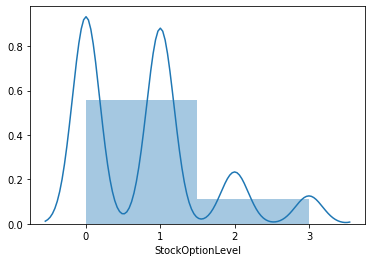

In [10]:
sns.distplot(data['StockOptionLevel'],bins=2)
data['Stock_Option_Level'] = pd.cut(data['StockOptionLevel'], [0, 1, 3], labels=['0-1','2-3'])


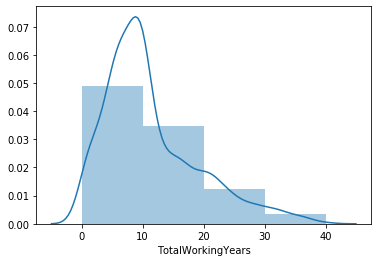

In [11]:
sns.distplot(data['TotalWorkingYears'],bins=4)
data['TotalWorkingYears'] = pd.cut(data['TotalWorkingYears'], [0, 7, 15, 40], labels=['0-7','8-15','16-40'])


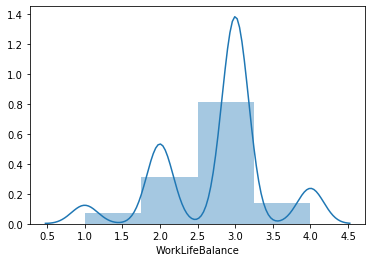

In [12]:
sns.distplot(data['WorkLifeBalance'],bins=4)
data['WorkLifeBalance'] = pd.cut(data['WorkLifeBalance'], [0, 2, 3, 4], labels=['0-2','3','4'])


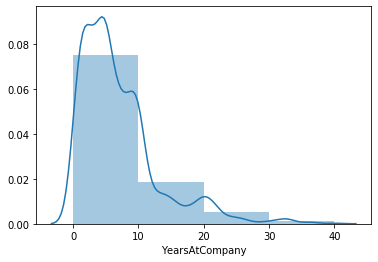

In [13]:
sns.distplot(data['YearsAtCompany'],bins=4)
data['YearsAtCompany'] = pd.cut(data['YearsAtCompany'], [0, 5, 10, 40], labels=['0-5','6-10','11-40'])


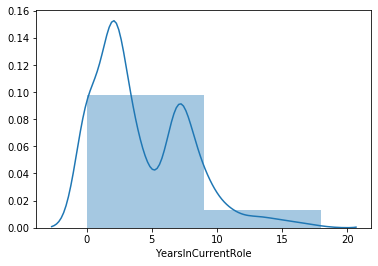

In [14]:
sns.distplot(data['YearsInCurrentRole'],bins=2)
data['YearsInCurrentRole'] = pd.cut(data['YearsInCurrentRole'], [0, 5, 7, 20], labels=['0-5','6-7','>8'])


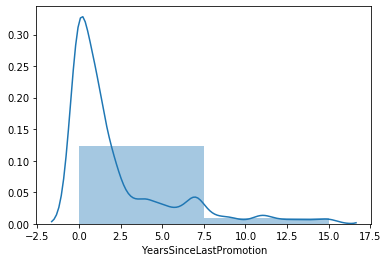

In [15]:
sns.distplot(data['YearsSinceLastPromotion'],bins=2)
data['YearsSinceLastPromotion'] = pd.cut(data['YearsSinceLastPromotion'], [0, 3, 7, 15], labels=['0-3','4-7','>8'])


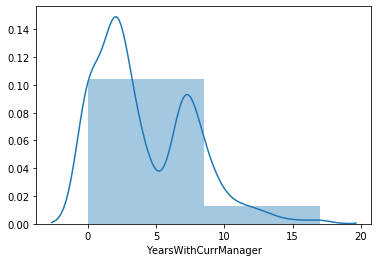

In [16]:
sns.distplot(data['YearsWithCurrManager'],bins=2)
data['YearsWithCurrManager'] = pd.cut(data['YearsWithCurrManager'], [0, 2, 5, 20], labels=['0-2','3-5','>6'])


In [17]:
data = pd.get_dummies(data)
data.drop(columns=['Age','MonthlyIncome','DistanceFromHome','HourlyRate'
                   ,'NumCompaniesWorked','TrainingTimesLastYear','StockOptionLevel'
                   ,'JobLevel','PercentSalaryHike'], inplace=True)
data.head()


,Attrition,EmployeeNumber,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,Education_Bachelor,Education_Below Collage,Education_College,Education_Doctor,Education_Master,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,EnvironmentSatisfaction_Negative,EnvironmentSatisfaction_Positive,Gender_Female,Gender_Male,JobInvolvement_Negative,JobInvolvement_Positive,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,JobSatisfaction_Negative,JobSatisfaction_Positive,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes,PerformanceRating_Excellent,PerformanceRating_Oustanding,RelationshipSatisfaction_Negative,RelationshipSatisfaction_Positive,TotalWorkingYears_0-7,TotalWorkingYears_8-15,TotalWorkingYears_16-40,WorkLifeBalance_0-2,WorkLifeBalance_3,WorkLifeBalance_4,YearsAtCompany_0-5,YearsAtCompany_6-10,YearsAtCompany_11-40,YearsInCurrentRole_0-5,YearsInCurrentRole_6-7,YearsInCurrentRole_>8,YearsSinceLastPromotion_0-3,YearsSinceLastPromotion_4-7,YearsSinceLastPromotion_>8,YearsWithCurrManager_0-2,YearsWithCurrManager_3-5,YearsWithCurrManager_>6,Age_Bins_0-25,Age_Bins_26-30,Age_Bins_31-40,Age_Bins_>60,Monthly_Income_0-3000,Monthly_Income_3001-5000,Monthly_Income_5001-10000,Monthly_Income_10001-20000,Distance_From_Home_0-5 Mi,Distance_From_Home_6-10 Mi,Distance_From_Home_11-15 Mi,Distance_From_Home_16-30 Mi,Num_Companies_Worked_0-2,Num_Companies_Worked_3-4,Num_Companies_Worked_5-10,Percent_Salary_Hike_0-11%,Percent_Salary_Hike_12-15%,Percent_Salary_Hike_16-30%,Stock_Option_Level_0-1,Stock_Option_Level_2-3
0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,1,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0
1,1,2,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0
2,0,4,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0
3,1,5,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0
4,1,7,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,1,0


In [19]:
data.to_csv('IBM Preprocessed Data.csv')